# Lumber Prices

* **Data:** `lumber-prices.csv`
* **Description:** Chicago lumber futures per 1000 board feet, in USD. To keep things simple, we're going to say that this is the measurement over a month instead of just one date per month. Basically: each month, how much you'd pay if you bought 125 2x4 boards at the hardware store.
* **Source:** https://tradingeconomics.com/commodity/lumber
* **Columns of interest:**
    * `Open` is the price at the start of the month
    * `High` is the high price over the course of the month
    * `Low` is the low number over the course of the month
    * `Close` is the number at the end of the month

## Read in your data

In [1]:
import pandas as pd
pd.set_option('max_columns', None)

import numpy as np

/Users/ilenapeng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv('lumber-prices.csv')
df.head()

,open,high,low,close,date
0,$407.00,$424.70,$377.00,$424.70,1996-12-09T00:00:00
1,$426.00,$450.50,$395.00,$411.40,1997-01-02T00:00:00
2,$408.50,$421.50,$382.10,$383.50,1997-02-03T00:00:00
3,$386.00,$389.70,$355.00,$380.50,1997-03-03T00:00:00
4,$378.00,$417.50,$376.50,$403.10,1997-04-01T00:00:00


In [3]:
df.open = df.open.str.replace('$', '').astype(float)
df.high = df.high.str.replace('$', '').astype(float)
df.low = df.low.str.replace('$', '').astype(float)
df.close = df.close.str.replace('$', '').astype(float)

/var/folders/9x/ttxn_gwj0592mr6h8s5y29980000gn/T/ipykernel_2851/3997235610.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.open = df.open.str.replace('$', '').astype(float)
/var/folders/9x/ttxn_gwj0592mr6h8s5y29980000gn/T/ipykernel_2851/3997235610.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.high = df.high.str.replace('$', '').astype(float)
/var/folders/9x/ttxn_gwj0592mr6h8s5y29980000gn/T/ipykernel_2851/3997235610.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.low = df.low.str.replace('$', '').as

In [4]:
df.dtypes

open     float64
high     float64
low      float64
close    float64
date      object
dtype: object

## What is the earliest month in this dataset?

We only have one reading per month, so you could also read this as "what is the earliest date in the dataset"

In [5]:
df.date = pd.to_datetime(df.date, format="%Y-%m-%d")
df.date

0     1996-12-09
1     1997-01-02
2     1997-02-03
3     1997-03-03
4     1997-04-01
         ...    
295   2021-07-01
296   2021-08-02
297   2021-09-01
298   2021-10-01
299   2021-11-01
Name: date, Length: 300, dtype: datetime64[ns]

In [6]:
df.date.min()

Timestamp('1996-12-09 00:00:00')

## What 3 months had the highest high lumber price?

In [7]:
df.resample('M', on='date').high.max().sort_values(ascending=False).head(3)

date
2021-05-31    1711.2
2021-04-30    1502.3
2021-06-30    1380.0
Name: high, dtype: float64

In [8]:
df.head()

,open,high,low,close,date
0,407.0,424.7,377.0,424.7,1996-12-09
1,426.0,450.5,395.0,411.4,1997-01-02
2,408.5,421.5,382.1,383.5,1997-02-03
3,386.0,389.7,355.0,380.5,1997-03-03
4,378.0,417.5,376.5,403.1,1997-04-01


## What is the median "high" lumber price in our dataset?

In [9]:
df.high.median()

329.65

## Plot the lowest "low" lumber price on an annual basis.

<AxesSubplot:xlabel='date'>

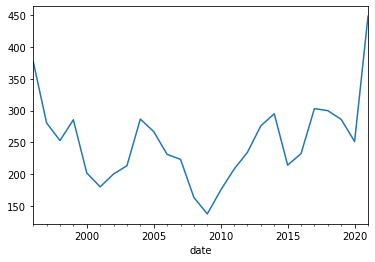

In [10]:
df.resample('Y', on='date').low.min().plot()

## What month in our dataset had the largest swing between high and low?

You'll want to create a new column for this one

In [11]:
df['swing'] = df.high - df.low
# df.swing

In [12]:
df.resample('M', on='date').swing.max().sort_values(ascending=False).head(1)

date
2021-06-30    675.0
Name: swing, dtype: float64

## In how many months did lumber prices rise?

If the price was greater at the end of the month than the beginning of the month, we'll say the price rose.

In [13]:
# looking at 'Open' versus 'Close'
df['month_difference'] = df.close - df.open
# if month_difference is POSITIVE, then prices rose. if it is negative, then prices declined

In [14]:
len(df[df.month_difference > 0])

145

In [15]:
df['rise_fall'] = np.where((df.month_difference > 0), 'Rise', 'Fall')

In [16]:
df.head()

,open,high,low,close,date,swing,month_difference,rise_fall
0,407.0,424.7,377.0,424.7,1996-12-09,47.7,17.7,Rise
1,426.0,450.5,395.0,411.4,1997-01-02,55.5,-14.6,Fall
2,408.5,421.5,382.1,383.5,1997-02-03,39.4,-25.0,Fall
3,386.0,389.7,355.0,380.5,1997-03-03,34.7,-5.5,Fall
4,378.0,417.5,376.5,403.1,1997-04-01,41.0,25.1,Rise


## In 2000, how many months saw lumber prices rise vs lumber prices fall?

In [17]:
df[df['date'].dt.year == 2000].rise_fall.value_counts()

Fall    10
Rise     2
Name: rise_fall, dtype: int64